In [1]:
%matplotlib inline

# import keras
import keras
from keras import backend as K 

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption, draw_detections
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu
from keras_retinanet.losses import smooth_l1, focal
from keras_retinanet.preprocessing import csv_generator
from keras_retinanet.utils.eval import evaluate

# other imports
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2


setup_gpu(0)

Using TensorFlow backend.


2 Physical GPUs, 1 Logical GPUs


In [2]:
#load model 
weights_path = Path('/data/students_home/fschipani/thesis/MSc-Thesis-PJ/Dataset/RFI/frames/snapshots')
model = models.load_model(weights_path.joinpath('resnet50_csv_14.h5'), backbone_name='resnet50')
model = models.convert_model(model, anchor_params=None)
labels_to_names = {
    0: 'person',
    1: 'cyclist',
    2: 'cars'
}

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [3]:
dataset_path = Path('/data/students_home/fschipani/thesis/MSc-Thesis-PJ/Dataset/RFI')
annotations = dataset_path.joinpath('test_video/video1/dataset.csv')
classes = dataset_path.joinpath('class.csv')

image_generator = csv_generator.CSVGenerator(
    annotations,
    classes,
    shuffle_groups=False,
    auto_augment=None,
    rand_augment=None,
    config=None)

In [4]:
image_list = []
for i in range(image_generator.size()):
    image_list.append([image_generator.image_path(i).
                       replace('/data/students_home/fschipani/thesis/MSc-Thesis-PJ/Dataset/RFI/test_video/video1/frames/video', 
                               '').replace('.jpg', ''), i])
print(len(image_list))

9445


In [5]:
image_list = sorted(image_list, key = lambda x: int(x[0]))
image_generator.image_path(image_list[700][1])

'/data/students_home/fschipani/thesis/MSc-Thesis-PJ/Dataset/RFI/test_video/video1/frames/video0701.jpg'

In [6]:
score_threshold = 0.9
image_500 = image_generator.load_image(image_list[500][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_500, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_500_boxes      = boxes[0, indices[scores_sort], :]
image_500_scores     = scores[scores_sort]
image_500_labels     = labels[0, indices[scores_sort]]
image_500_detections = np.concatenate(
    [image_500_boxes, np.expand_dims(image_500_scores, axis=1), np.expand_dims(image_500_labels, axis=1)]
    , axis=1)
draw_detections(image_500, 
                image_500_boxes, 
                image_500_scores, 
                image_500_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
#plt.figure(figsize=(15, 15))
#plt.axis('off')
#plt.imshow(image_500)
#plt.show()

In [7]:
score_threshold = 0.9
image_501 = image_generator.load_image(image_list[501][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_501, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_501_boxes      = boxes[0, indices[scores_sort], :]
image_501_scores     = scores[scores_sort]
image_501_labels     = labels[0, indices[scores_sort]]
image_501_detections = np.concatenate(
    [image_501_boxes, np.expand_dims(image_501_scores, axis=1), np.expand_dims(image_501_labels, axis=1)]
    , axis=1)

draw_detections(image_501, 
                image_501_boxes, 
                image_501_scores, 
                image_501_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
#plt.figure(figsize=(10, 10))
#plt.axis('off')
#plt.imshow(image_501)
#plt.show()

In [8]:
score_threshold = 0.9
image_502 = image_generator.load_image(image_list[502][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_502, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_502_boxes      = boxes[0, indices[scores_sort], :]
image_502_scores     = scores[scores_sort]
image_502_labels     = labels[0, indices[scores_sort]]
# add fake detection
image_502_boxes = np.array([image_502_boxes[0], image_502_boxes[1], np.array([400, 264, 500, 359])]) #x_min, y_min, x_max, y_max
image_502_scores = np.array([image_502_scores[0],image_502_scores[1], 0.91])
image_502_labels = np.array([image_502_labels[0],image_502_labels[1], 0])

###############
image_502_detections = np.concatenate(
    [image_502_boxes, np.expand_dims(image_502_scores, axis=1), np.expand_dims(image_502_labels, axis=1)]
    , axis=1)

draw_detections(image_502, 
                image_502_boxes, 
                image_502_scores, 
                image_502_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
#plt.figure(figsize=(10,10))
#plt.axis('off')
#plt.imshow(image_502)
#plt.show()

In [9]:
score_threshold = 0.9
image_700 = image_generator.load_image(image_list[700][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_700, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_700_boxes      = boxes[0, indices[scores_sort], :]
image_700_scores     = scores[scores_sort]
image_700_labels     = labels[0, indices[scores_sort]]
image_700_detections = np.concatenate(
    [image_700_boxes, np.expand_dims(image_700_scores, axis=1), np.expand_dims(image_700_labels, axis=1)]
    , axis=1)

draw_detections(image_700, 
                image_700_boxes, 
                image_700_scores, 
                image_700_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
#plt.figure(figsize=(10,10))
#plt.axis('off')
#plt.imshow(image_700)
#plt.show()

In [10]:
def compute_intersection_over_union(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    box_1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box_2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    intersection_over_union = intersection_area / float(box_1_area + box_2_area - intersection_area)
    return intersection_over_union

compute_intersection_over_union(image_500_boxes[0], image_700_boxes[0])

0.23313175357437274

In [11]:
compute_intersection_over_union(image_501_boxes[0], image_502_boxes[0])

0.9874242252129749

In [12]:
from rtree import index
idx = index.Index(interleaved=True)
# standard retinanet: x_min, y_min, x_max, y_max
# standard r-tree (interleaved = True): same as retinanet 
idx.insert(0, image_502_boxes[0]) #id, coordinates
idx.insert(1, image_502_boxes[1])

In [13]:
list(map(lambda x: x.bbox, idx.intersection(image_501_boxes[0], objects=True)))

[[75.51245880126953, 143.47314453125, 153.8429412841797, 367.23858642578125]]

In [14]:
def calc_bbox_size(bbox):
    """
    Get the size of bbox in input
    # Arguments
        bbox       : coordinates of bbox (x_min, y_min, x_max, y_max).
    # Returns
        size of bbox
    """
    return (bbox[2]-bbox[0])*(bbox[3]-bbox[1])
    

(-0.5, 639.5, 511.5, -0.5)

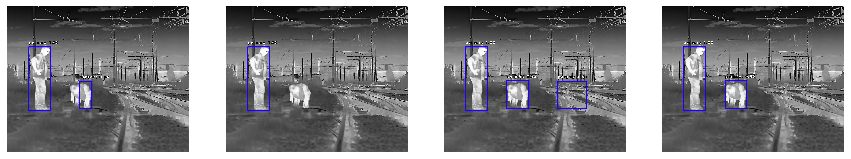

In [15]:
score_threshold = 0.9
image_503 = image_generator.load_image(image_list[503][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_503, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_503_boxes      = boxes[0, indices[scores_sort], :]
image_503_scores     = scores[scores_sort]
image_503_labels     = labels[0, indices[scores_sort]]
draw_detections(image_503, 
                image_503_boxes, 
                image_503_scores, 
                image_503_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)

f, axarr = plt.subplots(1,4, figsize=(15,15))
axarr[0].imshow(image_500)
axarr[0].axis('off')
axarr[1].imshow(image_501)
axarr[1].axis('off')
axarr[2].imshow(image_502)
axarr[2].axis('off')
axarr[3].imshow(image_503)
axarr[3].axis('off')


In [16]:
iou_threshold = 0.3
current_frame_boxes = image_503_boxes
current_frame_scores = image_503_scores
current_frame_labels = image_503_labels
bbox = [image_500_boxes, image_501_boxes, image_502_boxes]
scores = [image_500_scores, image_501_scores, image_502_scores]
labels = [image_500_labels, image_501_labels, image_502_labels]
preprocessed_bbox = [None]*100
preprocessed_scores = [None]*100
preprocessed_labels = [None]*100
for frame in range(len(bbox)):
    idx = index.Index(interleaved=True)
    id_t = 0
    for detection in bbox[frame]:
        idx.insert(id_t, detection)
        id_t = id_t+1
    for i in range(len(current_frame_boxes)):
        s_bbox = list(map(lambda x: x.bbox, idx.nearest(current_frame_boxes[i], num_results=1, objects=True)))[0]
        iou_value = compute_intersection_over_union(current_frame_boxes[i], s_bbox)
        if i < len(bbox[frame]) and iou_value > iou_threshold:
            preprocessed_labels.append(current_frame_labels[i])
            if preprocessed_bbox[i] is not None:
                preprocessed_bbox[i] = max(np.array([np.array(preprocessed_bbox[i]), current_frame_boxes[i], bbox[frame][i]]), key = calc_bbox_size)
                preprocessed_scores[i] = max(np.array([preprocessed_scores[i], current_frame_scores[i], scores[frame][i]]))
            else:
                preprocessed_bbox[i] = max(np.array([current_frame_boxes[i], bbox[frame][i]]), key = calc_bbox_size)
                preprocessed_scores[i] = max(np.array([current_frame_scores[i], scores[frame][i]]))
preprocessed_bbox = np.array([f for f in preprocessed_bbox if f is not None])
preprocessed_labels = [f for f in preprocessed_labels if f is not None]
preprocessed_scores = np.array([f for f in preprocessed_scores if f is not None])

(-0.5, 639.5, 511.5, -0.5)

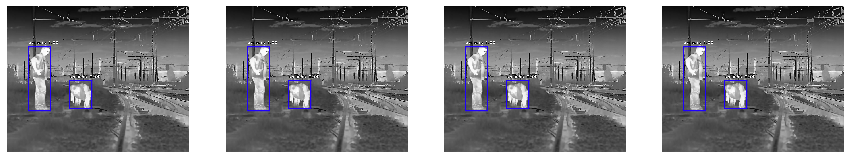

In [17]:
#reload and plot images
image_500 = image_generator.load_image(image_list[500][1])
image_501 = image_generator.load_image(image_list[501][1])
image_502 = image_generator.load_image(image_list[502][1])
image_503 = image_generator.load_image(image_list[503][1])
draw_detections(image_500, 
                preprocessed_bbox, 
                preprocessed_scores, 
                preprocessed_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_501, 
                preprocessed_bbox, 
                preprocessed_scores, 
                preprocessed_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_502, 
                preprocessed_bbox, 
                preprocessed_scores, 
                preprocessed_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_503, 
                preprocessed_bbox, 
                preprocessed_scores, 
                preprocessed_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)

f, axarr = plt.subplots(1,4, figsize=(15,15))
axarr[0].imshow(image_500)
axarr[0].axis('off')
axarr[1].imshow(image_501)
axarr[1].axis('off')
axarr[2].imshow(image_502)
axarr[2].axis('off')
axarr[3].imshow(image_503)
axarr[3].axis('off')

[[ 75.5124588  143.47314453 153.84294128 367.23858643]
 [220.69174194 261.94128418 298.23562622 359.72930908]]
[0 0]
[0.99999994 0.94235122]


(-0.5, 639.5, 511.5, -0.5)

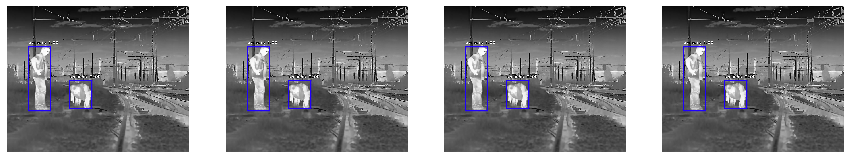

In [18]:
image_500 = image_generator.load_image(image_list[500][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_500, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_500_boxes      = boxes[0, indices[scores_sort], :]
image_500_scores     = scores[scores_sort]
image_500_labels     = labels[0, indices[scores_sort]]
########################################################
image_501 = image_generator.load_image(image_list[501][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_501, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_501_boxes      = boxes[0, indices[scores_sort], :]
image_501_scores     = scores[scores_sort]
image_501_labels     = labels[0, indices[scores_sort]]
########################################################
image_502 = image_generator.load_image(image_list[502][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_502, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_502_boxes      = boxes[0, indices[scores_sort], :]
image_502_scores     = scores[scores_sort]
image_502_labels     = labels[0, indices[scores_sort]]
image_502_boxes = np.array([image_502_boxes[0], image_502_boxes[1], np.array([400, 264, 500, 359])]) #x_min, y_min, x_max, y_max
image_502_scores = np.array([image_502_scores[0],image_502_scores[1], 0.91])
image_502_labels = np.array([image_502_labels[0],image_502_labels[1], 0])
########################################################
image_503 = image_generator.load_image(image_list[503][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_503, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_503_boxes      = boxes[0, indices[scores_sort], :]
image_503_scores     = scores[scores_sort]
image_503_labels     = labels[0, indices[scores_sort]]


image_500_detections = np.concatenate(
    [image_500_boxes, np.expand_dims(image_500_scores, axis=1), np.expand_dims(image_500_labels, axis=1)]
    , axis=1)
image_501_detections = np.concatenate(
    [image_501_boxes, np.expand_dims(image_501_scores, axis=1), np.expand_dims(image_501_labels, axis=1)]
    , axis=1)
image_502_detections = np.concatenate(
    [image_502_boxes, np.expand_dims(image_502_scores, axis=1), np.expand_dims(image_502_labels, axis=1)]
    , axis=1)
image_503_detections = np.concatenate(
    [image_503_boxes, np.expand_dims(image_503_scores, axis=1), np.expand_dims(image_503_labels, axis=1)]
    , axis=1)
####################################################
detections = np.array([image_501_detections, image_500_detections, image_502_detections])
current_frame = image_503_detections
first_frame = image_502_detections
####################################################


iou_threshold = 0.3
preprocessed_bbox = [None]*100
preprocessed_scores = [None]*100
preprocessed_labels = [None]*100
for frame in detections:
    idx = index.Index(interleaved=True)
    id_t = 0
    for detection in frame:
        idx.insert(id_t, detection[0:4], obj = detection[4:6])
        id_t = id_t + 1
    for i in range(len(current_frame)):
        s_bbox = next(idx.nearest(current_frame[i][0:4], num_results=1, objects=True))
        iou_value = compute_intersection_over_union(current_frame[i][0:4], s_bbox.bbox)
        if iou_value > iou_threshold:
            preprocessed_labels[i] = current_frame[i][5]
            if preprocessed_bbox[i] is not None:
                preprocessed_bbox[i] = max(
                    np.array([
                        np.array(preprocessed_bbox[i]), 
                        np.array(current_frame[i][0:4]), 
                        s_bbox.bbox
                    ]), 
                    key = calc_bbox_size)
                preprocessed_scores[i] = max(
                    np.array([
                        preprocessed_scores[i], 
                        current_frame[i][4], 
                        s_bbox.object[0] ])
                )
            else:
                preprocessed_bbox[i] = max(
                    np.array([
                        np.array(current_frame[i][0:4]), 
                        s_bbox.bbox ]), 
                    key = calc_bbox_size)
                preprocessed_scores[i] = max(np.array([
                    current_frame[i][4], 
                    s_bbox.object[0]
                ]))
id_t = 0
for detection in current_frame:
    break
    idx.insert(id_t, detection[0:4], obj = detection[4:6])
    id_t = id_t + 1
    for i in range(len(first_frame)):
        s_bbox = next(idx.nearest(first_frame[i][0:4], num_results=1, objects=True))
        iou_value = compute_intersection_over_union(first_frame[i][0:4], s_bbox.bbox)
        if iou_value > iou_threshold:
            preprocessed_labels[i] = first_frame[i][5]
            if preprocessed_bbox[i] is not None:
                preprocessed_bbox[i] = max(
                    np.array([
                        np.array(preprocessed_bbox[i]), 
                        np.array(first_frame[i][0:4]), 
                        s_bbox.bbox
                    ]), 
                    key = calc_bbox_size)
                preprocessed_scores[i] = max(
                    np.array([
                        preprocessed_scores[i], 
                        first_frame[i][4], 
                        s_bbox.object[0] ])
                )
            else:
                preprocessed_bbox[i] = max(
                    np.array([
                        np.array(first_frame[i][0:4]), 
                        s_bbox.bbox ]), 
                    key = calc_bbox_size)
                preprocessed_scores[i] = max(np.array([
                    first_frame[i][4], 
                    s_bbox.object[0]
                ]))
                
                
                
                

preprocessed_bbox = np.array([f for f in preprocessed_bbox if f is not None])
preprocessed_labels = np.array([f for f in preprocessed_labels if f is not None], dtype=int)
preprocessed_scores = np.array([f for f in preprocessed_scores if f is not None])
image_500 = image_generator.load_image(image_list[500][1])
image_501 = image_generator.load_image(image_list[501][1])
image_502 = image_generator.load_image(image_list[502][1])
image_503 = image_generator.load_image(image_list[503][1])
print(preprocessed_bbox)
print(preprocessed_labels)
print(preprocessed_scores)
draw_detections(image_500, 
                preprocessed_bbox, 
                preprocessed_scores, 
                preprocessed_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_501, 
                preprocessed_bbox, 
                preprocessed_scores, 
                preprocessed_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_502, 
                preprocessed_bbox, 
                preprocessed_scores, 
                preprocessed_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_503, 
                preprocessed_bbox, 
                preprocessed_scores, 
                preprocessed_labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)

f, axarr = plt.subplots(1,4, figsize=(15,15))
axarr[0].imshow(image_500)
axarr[0].axis('off')
axarr[1].imshow(image_501)
axarr[1].axis('off')
axarr[2].imshow(image_502)
axarr[2].axis('off')
axarr[3].imshow(image_503)
axarr[3].axis('off')

In [19]:
def iou_evaluation(threshold, current_frame, first_frame, detections):
    iou_threshold = 0.3
    preprocessed_bbox = [None]*100
    preprocessed_scores = [None]*100
    preprocessed_labels = [None]*100
    for frame in detections:
        idx = index.Index(interleaved=True)
        id_t = 0
        for detection in frame:
            idx.insert(id_t, detection[0:4], obj = detection[4:6])
            id_t = id_t + 1
        for i in range(len(current_frame)):
            s_bbox = next(idx.nearest(current_frame[i][0:4], num_results=1, objects=True))
            iou_value = compute_intersection_over_union(current_frame[i][0:4], s_bbox.bbox)
            if iou_value > iou_threshold:
                preprocessed_labels[i] = current_frame[i][5]
                if preprocessed_bbox[i] is not None:
                    preprocessed_bbox[i] = max(
                        np.array([
                            np.array(preprocessed_bbox[i]), 
                            np.array(current_frame[i][0:4]), 
                            s_bbox.bbox
                        ]), 
                        key = calc_bbox_size)
                    preprocessed_scores[i] = max(
                        np.array([
                            preprocessed_scores[i], 
                            current_frame[i][4], 
                            s_bbox.object[0] ])
                    )
                else:
                    preprocessed_bbox[i] = max(
                        np.array([
                            np.array(current_frame[i][0:4]), 
                            s_bbox.bbox ]), 
                        key = calc_bbox_size)
                    preprocessed_scores[i] = max(np.array([
                        current_frame[i][4], 
                        s_bbox.object[0]
                    ]))
    
    preprocessed_bbox = np.array([f for f in preprocessed_bbox if f is not None])
    preprocessed_labels = np.array([f for f in preprocessed_labels if f is not None], dtype=int)
    preprocessed_scores = np.array([f for f in preprocessed_scores if f is not None])
    return preprocessed_bbox, preprocessed_labels, preprocessed_scores


In [26]:
total_detections = np.array([image_500_detections, image_501_detections, image_502_detections, image_503_detections])

def iou_evaluation_2(detections, threshold):
    index_max_detections = np.argmax(list(map(lambda x: len(x), detections)))
    id_tree = 0
    idx = index.Index(interleaved=True)
    iou_values = [0]*len(detections[index_max_detections])
    print(np.delete(detections, index_max_detections))
    for detection in np.concatenate(np.delete(detections, index_max_detections)):
        idx.insert(id_tree, detection[0:4], obj = detection[4:6])
        id_tree = id_tree + 1
    for i in range(len(detections[index_max_detections])):
        intersection_bbox = idx.intersection(detections[index_max_detections][i][0:4], objects=True)
        num_elem = 0
        for item in intersection_bbox:
            num_elem = i+1
            iou_values[i] += compute_intersection_over_union(item.bbox, detections[index_max_detections][i][0:4])
        if num_elem is not 0:
            iou_values[i] /= num_elem
    iou_values = np.divide(iou_values, len(detections)-1)
    bbox = []
    labels = []
    scores = []
    for det, iou in zip(detections[index_max_detections], iou_values):
        if iou > threshold:
            intersection_bbox = idx.intersection(det[0:4], objects=True)
            gen = list(intersection_bbox)
            max_bbox_index = np.argmax(list(map(lambda x: calc_bbox_size(x), list(map(lambda x: x.bbox, gen)))))
            bbox.append(gen[max_bbox_index].bbox)
            scores.append(max(list(map(lambda x: x.object[0], gen))))
            labels.append(gen[max_bbox_index].object[1])
    return np.array(bbox), np.array(scores), np.array(labels, dtype=int), iou_values
            
        
        
print(iou_evaluation_2(total_detections, 0.2)[1])
        

[array([[ 76.36475372, 143.21192932, 153.77825928, 367.24908447,
          0.99999994,   0.        ],
       [254.14622498, 264.33413696, 298.4201355 , 359.390625  ,
          0.94235122,   0.        ]])
 array([[ 76.00954437, 143.94981384, 153.6839447 , 367.74407959,
          0.99999994,   0.        ]])
 array([[ 75.76010132, 143.69567871, 152.58143616, 367.47668457,
          0.99999988,   0.        ],
       [222.54138184, 262.71572876, 297.82794189, 359.52233887,
          0.90464449,   0.        ]])]
[0.99999994 0.94235122]


In [21]:
index_max_detections = np.argmax(list(map(lambda x: len(x), total_detections)))
id_tree = 0
idx = index.Index(interleaved=True)
iou_values = [0]*len(detections[index_max_detections])
for detection in np.concatenate(np.delete(detections, index_max_detections)):
    print(detection)
    idx.insert(id_t, detection[0:4], obj = detection[4:6])
    id_tree = id_tree + 1



[ 76.00954437 143.94981384 153.6839447  367.74407959   0.99999994
   0.        ]
[ 76.36475372 143.21192932 153.77825928 367.24908447   0.99999994
   0.        ]
[254.14622498 264.33413696 298.4201355  359.390625     0.94235122
   0.        ]


[array([[ 76.36475372, 143.21192932, 153.77825928, 367.24908447,
          0.99999994,   0.        ],
       [254.14622498, 264.33413696, 298.4201355 , 359.390625  ,
          0.94235122,   0.        ]])
 array([[ 76.00954437, 143.94981384, 153.6839447 , 367.74407959,
          0.99999994,   0.        ]])
 array([[ 75.76010132, 143.69567871, 152.58143616, 367.47668457,
          0.99999988,   0.        ],
       [222.54138184, 262.71572876, 297.82794189, 359.52233887,
          0.90464449,   0.        ]])]
[0.98455782 0.25308872 0.        ]


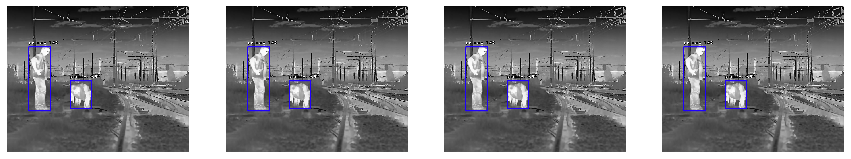

In [27]:
image_500 = image_generator.load_image(image_list[500][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_500, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_500_boxes      = boxes[0, indices[scores_sort], :]
image_500_scores     = scores[scores_sort]
image_500_labels     = labels[0, indices[scores_sort]]
########################################################
image_501 = image_generator.load_image(image_list[501][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_501, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_501_boxes      = boxes[0, indices[scores_sort], :]
image_501_scores     = scores[scores_sort]
image_501_labels     = labels[0, indices[scores_sort]]
########################################################
image_502 = image_generator.load_image(image_list[502][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_502, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_502_boxes      = boxes[0, indices[scores_sort], :]
image_502_scores     = scores[scores_sort]
image_502_labels     = labels[0, indices[scores_sort]]
image_502_boxes = np.array([image_502_boxes[0], image_502_boxes[1], np.array([400, 264, 500, 359])]) #x_min, y_min, x_max, y_max
image_502_scores = np.array([image_502_scores[0],image_502_scores[1], 0.91])
image_502_labels = np.array([image_502_labels[0],image_502_labels[1], 0])
########################################################
image_503 = image_generator.load_image(image_list[503][1])
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image_503, axis=0))
indices = np.where(scores[0, :] > score_threshold)[0]
scores = scores[0][indices]
scores_sort = np.argsort(-scores)[:100]
image_503_boxes      = boxes[0, indices[scores_sort], :]
image_503_scores     = scores[scores_sort]
image_503_labels     = labels[0, indices[scores_sort]]


image_500_detections = np.concatenate(
    [image_500_boxes, np.expand_dims(image_500_scores, axis=1), np.expand_dims(image_500_labels, axis=1)]
    , axis=1)
image_501_detections = np.concatenate(
    [image_501_boxes, np.expand_dims(image_501_scores, axis=1), np.expand_dims(image_501_labels, axis=1)]
    , axis=1)
image_502_detections = np.concatenate(
    [image_502_boxes, np.expand_dims(image_502_scores, axis=1), np.expand_dims(image_502_labels, axis=1)]
    , axis=1)
image_503_detections = np.concatenate(
    [image_503_boxes, np.expand_dims(image_503_scores, axis=1), np.expand_dims(image_503_labels, axis=1)]
    , axis=1)

total_detections = np.array([image_500_detections, image_501_detections, image_502_detections, image_503_detections])
total_detections_name = np.array(['image_500', 'image_501', 'image_502', 'image_503'])

bbox, scores, labels, iou_values = iou_evaluation_2(total_detections, 0.2)

draw_detections(image_500, 
                bbox, 
                scores, 
                labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_501, 
                bbox, 
                scores, 
                labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_502, 
                bbox, 
                scores, 
                labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)
draw_detections(image_503, 
                bbox, 
                scores, 
                labels, 
                label_to_name=image_generator.label_to_name, 
                score_threshold=0.9)

f, axarr = plt.subplots(1,4, figsize=(15,15))
axarr[0].imshow(image_500)
axarr[0].axis('off')
axarr[1].imshow(image_501)
axarr[1].axis('off')
axarr[2].imshow(image_502)
axarr[2].axis('off')
axarr[3].imshow(image_503)
axarr[3].axis('off')
print(iou_values)

In [25]:
total_detections.shape


(4,)

In [24]:
detections = []
detections.append(image_500_detections)
detections.append(image_501_detections)
detections.append(image_502_detections)
detections.append(image_503_detections)
np.array(detections)

array([array([[ 76.36475372, 143.21192932, 153.77825928, 367.24908447,
          0.99999994,   0.        ],
       [254.14622498, 264.33413696, 298.4201355 , 359.390625  ,
          0.94235122,   0.        ]]),
       array([[ 76.00954437, 143.94981384, 153.6839447 , 367.74407959,
          0.99999994,   0.        ]]),
       array([[ 75.5124588 , 143.47314453, 153.84294128, 367.23858643,
          0.99999982,   0.        ],
       [220.69174194, 261.94128418, 298.23562622, 359.72930908,
          0.92013514,   0.        ],
       [400.        , 264.        , 500.        , 359.        ,
          0.91      ,   0.        ]]),
       array([[ 75.76010132, 143.69567871, 152.58143616, 367.47668457,
          0.99999988,   0.        ],
       [222.54138184, 262.71572876, 297.82794189, 359.52233887,
          0.90464449,   0.        ]])], dtype=object)